# InstaBot - Part 2

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

from bs4 import BeautifulSoup
import time
import requests
import re

In [2]:
import matplotlib.pyplot as plt  # for plot a graph 
import pandas as pd              # for create DataFrame 
import numpy as np

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())
# for maximize chrome page
driver.maximize_window()

In [4]:
def Insta_login(username, passwoard):
    url = "https://www.instagram.com/accounts/login/?"
    # instgram login page
    driver.get(url)
    driver.implicitly_wait(3)
    # input username 
    name = driver.find_element_by_name('username').send_keys(username)
    # input passward
    pssward = driver.find_element_by_name('password').send_keys(passwoard)
    driver.implicitly_wait(6)
    # hit Enter login button using xpath
    driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]/button').click()
    
    # after login hit Enter Not Now button
    try:
        wait = WebDriverWait(driver, 6)
        not_now_btn = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
        wait = WebDriverWait(driver, 6)
        not_now_btn2 = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
    except NoSuchElementException:
        pass
    

In [5]:
username = 'SAMPLE USERNAME'        # "SAMPLE USERNAME"
passwoard = 'SAMPLE PASSWORD'       # "SAMPLE PASSWORD"
Insta_login(username, passwoard)

# Question-1 Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

#### 1.1-From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

From InstaBot part-1 Question-2 search 'food' and find first 10 handles list

In [6]:
def search_food():
    # type 'food' in search bar 
    search_bar = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
    search_bar.send_keys('food')
    # for loading page we to wait
    driver.implicitly_wait(2)

In [7]:
def first10_handles():
    #call search_food function
    search_food()
    # take time for loading page
    time.sleep(2)
    follow = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[starts-with(@class, '_abnx _aeul')]/div")))
    foodBlogger = []
    for i in follow:
        # extract data using BeautifulSoup
        data = BeautifulSoup(i.get_attribute('innerHTML'), 'html.parser')
        food = data.find('div', {'class':'_aacl _aaco _aacw _adda _aacx _aad6'}).string
        if '#' not in food:
            foodBlogger.append(food)
            #print(food)
        if len(foodBlogger) == 10:
            break
    return foodBlogger

In [8]:
first10_handlesList = first10_handles()

In [9]:
# after Extracted all food search ,clear search bar
driver.find_element_by_xpath('//div[starts-with(@class, "_aawn")]').click()

#### Get followers of first 10 handles

In [12]:
def Followers_Of_first10Handles(first10_handlesList):
    no_of_followers = {}
    # find all followers of first 10 handles
    for i in first10_handlesList:
        # search food handles
        search = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
        search.send_keys(i)
        
        enter = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//div[starts-with(@class,'_abnx')]/div")))
        enter.click()

        # get followers
        follower = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//li[2][@class='_aa_5']//span")))
        f = follower.get_attribute('title')
        flwr = int(f.replace(",", "")) # remove comma in followers
        no_of_followers[i] = flwr
        time.sleep(1)
        
        # clear search box using xpath
        search = driver.find_element_by_xpath('//span[starts-with(@class, "_aawc")]').click()
        time.sleep(1)
        driver.find_element_by_xpath('//div[starts-with(@class, "_aawn")]').click()
        # back page
        driver.back()
        time.sleep(2)
    return no_of_followers

In [13]:
# find followers of first 10 handles using first10_handlesList list
Followers_Of_10Handles = Followers_Of_first10Handles(first10_handlesList)

#### After getting first 10 handles and its followers ,Now we need to find top 5 handles which have highest number of followers 

In [14]:
def top_five_handles(Followers_Of_10Handles):
    # sort the Followers_Of_10Handles dict in order to numbers of followers
    Dict = dict(sorted(Followers_Of_10Handles.items(), key = lambda item: item[1]))
    Dict = dict(list(Dict.items())[5:])
    bloggers = {}
    # to find top 5 handles which have highest number of followers, we need to reverse dict
    for k in reversed(list(Dict.keys())):
        bloggers[k] = Dict[k]
    return bloggers

In [15]:
# here I am taking Followers_Of_10Handles dict
Top_5_handles = top_five_handles(Followers_Of_10Handles)
for key in Top_5_handles:
    print(key,'--->', 'tatal ', Top_5_handles[key], 'followers')

foodgod ---> tatal  3886062 followers
foodinsider ---> tatal  2320813 followers
foodie_incarnate ---> tatal  1374495 followers
dilsefoodie ---> tatal  1027793 followers
foodbible ---> tatal  934928 followers


### 1.2-Now Find the number of posts these handles have done in the previous 3 days.

In [16]:
def pre_three_days_posts(Top_5_handles):
    for i in Top_5_handles:
        # search food bloger
        search = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
        search.send_keys(i)
    
        # hit Enter post
        driver.implicitly_wait(1)
        enter = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//div[starts-with(@class,'_abnx')]/div")))
        enter.click()
    
        time.sleep(1)
        # go to post
        enter_post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, '_aabd _aa8k _aanf')]")))  
        enter_post.click() 
        time.sleep(1)
    
        count = 1
        while True:
            # find post using xpath
            wait = WebDriverWait(driver, 10)
            post = wait.until(EC.presence_of_element_located((By.XPATH, "//time[@class='_aaqe']")))
            time.sleep(1)
            days = post.get_attribute('innerHTML')
            if days=='1 day ago' or days=='2 days ago' or days=='3 days ago' or 'hours' in days or 'hour' in days or 'minutes' in days:
                count += 1
                driver.implicitly_wait(3)
                driver.find_element_by_xpath("//div[contains(@class,' _aaqg _aaqh')]/button").click()
        
            else:
                # back page
                driver.back()
                # clear search box using xpath
                search = driver.find_element_by_xpath('//span[starts-with(@class, "_aawc")]').click()
                time.sleep(1)
                print(i,'-->',count-1,' number of posts have done in the previous 3 days')
                count = 1
                break
        driver.back()
        time.sleep(1)
        # clear search box using xpath
        search = driver.find_element_by_xpath('//span[starts-with(@class, "_aawc")]').click()
        time.sleep(1)
        driver.find_element_by_xpath('//div[starts-with(@class, "_aawn")]').click()
        # back page
        time.sleep(1)

In [17]:
pre_three_days_posts(Top_5_handles)

foodgod --> 0  number of posts have done in the previous 3 days
foodinsider --> 3  number of posts have done in the previous 3 days
foodie_incarnate --> 4  number of posts have done in the previous 3 days
dilsefoodie --> 6  number of posts have done in the previous 3 days
foodbible --> 1  number of posts have done in the previous 3 days


### 1.3-Depict this information using a suitable graph.

#### Plot a bar graph using the top 5 which have the highest number of followers

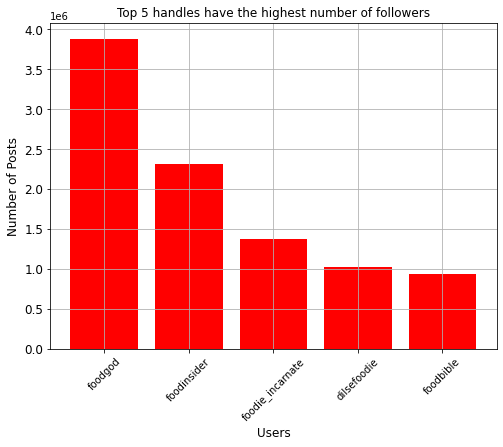

In [18]:
Top5 = []
no_of_follower = []
# here I am taking dict named Top_5_handles 
for key in Top_5_handles:
    Top5.append(key)
    no_of_follower.append(Top_5_handles[key])
    


plt.subplots(figsize=(8, 6))
# plot a bar using 5 handles and numbers of followers
plt.bar(Top5, no_of_follower, color = 'r')
plt.xticks(rotation=45)
plt.yticks(size=12)
plt.title('Top 5 handles have the highest number of followers', size=12)
plt.xlabel('Users', size=12)
plt.ylabel('Number of Posts', size=12)
plt.grid()
plt.show()

# Question-2 Your friend also needs a list of hashtags that he should use in his posts.

### 2.1-Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [19]:
def Five_handles_Contents(Top5):
    contents = []
    # taking the 5 handles list named->Top5 from que 1.3 
    for i in Top5:
        # search food bloger
        search = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
        search.send_keys(i)
    
        # hit Enter post
        driver.implicitly_wait(2)
        enter = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//div[starts-with(@class,'_abnx')]/div")))
        enter.click()
    
        time.sleep(1)
        # go to post
        enter_post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, '_aabd _aa8k _aanf')]")))  
        enter_post.click() 
        time.sleep(2)
    
        for i in range(10):
            # find content
            content = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[contains(@class, '_aacl _aaco _aacu _aacx _aad7 _aade')]")))  
            c = content.get_attribute('textContent')
            contents.append(c)
            
            time.sleep(0.5)
            # go to next post
            driver.find_element_by_xpath("//div[contains(@class,' _aaqg _aaqh')]/button").click()
            time.sleep(0.5)
        
        driver.back()
        time.sleep(1)
        # clear search box using xpath
        search = driver.find_element_by_xpath('//span[starts-with(@class, "_aawc")]').click()
        time.sleep(1)
        driver.find_element_by_xpath('//div[starts-with(@class, "_aawn")]').click()
        # back page
        time.sleep(1)
    
    return contents

In [20]:
# I am using top5 handles list from Que 1.3
contents = Five_handles_Contents(Top5)

In [21]:
for i in contents:
    print(i)
    print('------------------------------------------------------------------------------------------')

STILL the best bloomin’ onion!!
------------------------------------------------------------------------------------------
If you liked Choco Tacos, you gonna LOVE THIS!!
------------------------------------------------------------------------------------------
How cool is this thing??
------------------------------------------------------------------------------------------
Don’t talk 🤫.. just watch📹 @that_madras_guys
------------------------------------------------------------------------------------------
The ONLY CHICKEN PARM📹 @cheesy_travelers
------------------------------------------------------------------------------------------
THIS is a BENTO BOX!! Step up your game Japanese delivery restaurants 🍱📹 @mariona_foodie
------------------------------------------------------------------------------------------
Cronut or this supreme 🥐??
------------------------------------------------------------------------------------------
Edible skull almost killed me📹 @unlokt
-----------------

### 2.2-Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

### Here I am using contents list to extract all hash_tags words

In [22]:
def All_words_freq(contents):
    hash_tags = []
    for i in contents:
        li = i.split()
        hash_tags.append(li)
        
    hash_tags_dict = {}
    for word in hash_tags:
        for j in word:
            if j[0] == '#' and '@' not in j:
                # remove '#' and add in hash_tags_dict 
                if j[1:] in hash_tags_dict:
                    hash_tags_dict[j[1:]] += 1
                else:
                    hash_tags_dict[j[1:]] = 1
    return hash_tags_dict

In [23]:
all_words = All_words_freq(contents)

for key in all_words:
    print(key, '--->', all_words[key], ' frequency')

food ---> 1  frequency
paella ---> 1  frequency
spain ---> 1  frequency
seafood ---> 1  frequency
chocolatechipcookie ---> 1  frequency
bakery ---> 1  frequency
nyc ---> 1  frequency
foodinsider ---> 3  frequency
coffee ---> 1  frequency
coffeebeans ---> 1  frequency
agriculture ---> 1  frequency
tofu ---> 1  frequency
factory ---> 1  frequency
howitsmade ---> 1  frequency
sodelhi ---> 7  frequency
newdelhi ---> 7  frequency
foodtalkindia ---> 7  frequency
delhigram ---> 7  frequency
indianfood ---> 6  frequency
delhifoodblogger ---> 6  frequency
foodgasm ---> 7  frequency
foodporn ---> 6  frequency
foodpornshare ---> 6  frequency
foodlover ---> 6  frequency
foodgram ---> 6  frequency
foodiesofinstagram ---> 6  frequency
foodie ---> 6  frequency
indianstreetfood ---> 6  frequency
streetfood ---> 8  frequency
delhistreetfood ---> 7  frequency
streetfoodindia ---> 7  frequency
mumbaistreetfood ---> 6  frequency
delhifoodie ---> 6  frequency
foodblogger ---> 6  frequency
indianfoodie --->

### 2.3-Create a csv file with two columns : the word and its frequency

In [26]:
word = []
freq = []
for key in all_words:
    word.append(key)
    freq.append(all_words[key])
# create np array
np_word = np.array(word)
np_freq = np.array(freq)
# create data frame using pandas library 
data_frame = pd.DataFrame(list(zip(word, freq)), columns = ['Word', 'Frequency'])

In [27]:
data_frame

,Word,Frequency
0,food,1
1,paella,1
2,spain,1
3,seafood,1
4,chocolatechipcookie,1
...,...,...
99,amritmohatsav,1
100,DilSeDesi,1
101,dalmakhani,1
102,PalDhaba,1


In [28]:
# create csv file name 'word_and_its_frequency.csv' using pandas and download csv file
data_frame.to_csv('word_and_its_frequency.csv', index=False)

### 2.4-Now, find the hashtags that were most popular among these bloggers

We have two array named word and freq

In [29]:
# sort both array in descending order
np_word = np_word[np.argsort(np_freq)][::-1]
np_freq = np_freq[np.argsort(np_freq)][::-1]

In [30]:
for i in range(len(np_word)):
    print(np_word[i], '-->', np_freq[i])

dilsefoodie --> 10
dilsecouple --> 9
streetfood --> 8
sodelhi --> 7
delhigram --> 7
newdelhi --> 7
desikhana --> 7
foodgasm --> 7
foodtalkindia --> 7
delhistreetfood --> 7
streetfoodindia --> 7
foodlover --> 6
foodblogger --> 6
foodiesofinstagram --> 6
foodie --> 6
foodporn --> 6
indianstreetfood --> 6
delhifoodblogger --> 6
indianfood --> 6
foodpornshare --> 6
foodgram --> 6
delhifoodie --> 6
indianfoodie --> 6
indianfoodblogger --> 6
indianfoodbloggers --> 6
delhifood --> 6
mumbai --> 6
delhi --> 6
mumbaistreetfood --> 6
foodinsider --> 3
reelitfeelit --> 3
reelkarofeelkaro --> 3
reelsinstagram --> 3
reels --> 3
vadodara --> 2
viralfood --> 2
paratha --> 1
howitsmade --> 1
paella --> 1
spain --> 1
seafood --> 1
chocolatechipcookie --> 1
bakery --> 1
guava --> 1
kolkata --> 1
ghewar --> 1
ghaziabad --> 1
nyc --> 1
coffee --> 1
coffeebeans --> 1
agriculture --> 1
tofu --> 1
factory --> 1
tikkajunction --> 1
explore --> 1
PalDhaba --> 1
indianrecipes --> 1
vadapav --> 1
bangalorefood --

### 2.5-Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

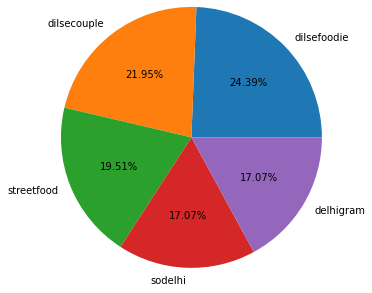

In [31]:
x = np_word[:5]
y = np_freq[:5]
# plot a pie chart
plt.pie(y, labels = x, autopct = '%.2f%%', radius = 1.5)
plt.show()

# Question-3 You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:

### 3.1-Find out the likes of the top 10 posts of the 5 handles obtained earlier.

Here I am using top 5 handles list obtained earlier

In [32]:
def posts_of_5_handles(Top5):
    top5handles = {}
    for blog in Top5:
        # search food bloger
        search = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
        search.send_keys(blog)

        # hit Enter post
        driver.implicitly_wait(1)
        enter = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//div[starts-with(@class,'_abnx')]/div")))
        enter.click()

        time.sleep(1)
        # go to post
        enter_post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, '_aabd _aa8k _aanf')]")))  
        enter_post.click() 
        time.sleep(1)
        # count first 10 posts likes
        count = 0
        for k in range(10):
            try:
                like = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[contains(@class, '_aacl _aaco _aacw _adda')]")))   
                for i in like:
                    html = i.get_attribute('innerHTML')
                    data = BeautifulSoup(html, 'html.parser').find('span')
                    if data != None:
                        likes = data.string
                        if '0' in likes or '1' in likes or '2' in likes or '3' in likes or '4' in likes or '5' in likes :  
                            # remove comma in likes and convert into int value
                            likes = int(likes.replace(",",""))
                            count += likes
                time.sleep(1)
                # go to next post
                driver.find_element_by_xpath("//div[contains(@class,' _aaqg _aaqh')]/button").click()
                time.sleep(1)
            except TypeError:
                like = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, '_aacl _aaco _aacw _adda _aacx _aada _aade')]/span")))    
                likes = like.text
                # remove comma in likes and convert into int value
                likes = int(likes.replace(",", ""))
                count += likes
                time.sleep(1)
                # go to next post
                driver.find_element_by_xpath("//div[contains(@class,' _aaqg _aaqh')]/button").click()
                time.sleep(1)
        # add handle as a key and total count as a value in top5handles dict
        top5handles[blog] = count
        driver.back()
        time.sleep(1)
        # clear search box using xpath
        search = driver.find_element_by_xpath('//span[starts-with(@class, "_aawc")]').click()
        time.sleep(0.5)
        driver.find_element_by_xpath('//div[starts-with(@class, "_aawn")]').click()
        # back page
        time.sleep(1)
    return top5handles

In [33]:
# call posts_of_5_handles fun to get a dict of 5 handles and its total likes of 10 posts
Top5Handles = posts_of_5_handles(Top5)

In [34]:
for key in Top5Handles:
    print(key, '-->','total Likes' ,Top5Handles[key], 'of 10 Posts')

foodgod --> total Likes 312751 of 10 Posts
foodinsider --> total Likes 88210 of 10 Posts
foodie_incarnate --> total Likes 1440093 of 10 Posts
dilsefoodie --> total Likes 89542 of 10 Posts
foodbible --> total Likes 11767 of 10 Posts


#### Plot a bar graph between the 5 handles obtained and total likes of first 10 posts

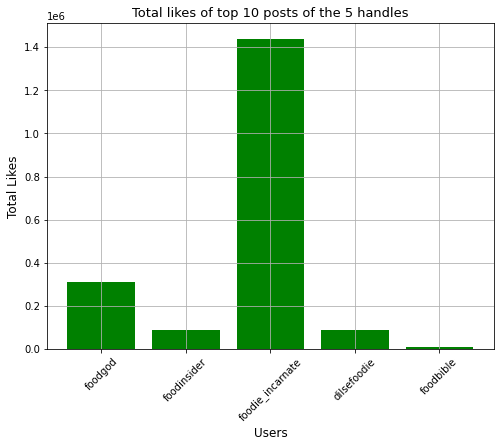

In [35]:
Likes10Posts = []
top5_handles = []
for i in Top5Handles:
    top5_handles.append(i)
    Likes10Posts.append(Top5Handles[i])
    
    

# plot a bar bar graph using Likes10Posts and handles
plt.subplots(figsize=(8, 6))
plt.bar(top5_handles, Likes10Posts, color='green')
plt.title('Total likes of top 10 posts of the 5 handles', size=13)
plt.xticks(rotation=45)
plt.xlabel('Users', size=12)
plt.ylabel('Total Likes', size=12)
plt.grid()
plt.show()

### 3.2-Calculate the average likes for a handle.

To calculate the average likes, we need to top5 handles list and Likes10Posts which I have obtained previous Question 

In [36]:
avg_likes = []
for i in range(5):
    # to find the average likes for a handle, we need to divide total_likes by 10
    average_likes =  int(format(Likes10Posts[i]/10, '.0f'))
    avg_likes.append(average_likes)
    print(top5_handles[i], ' : ', average_likes, 'average likes')

foodgod  :  31275 average likes
foodinsider  :  8821 average likes
foodie_incarnate  :  144009 average likes
dilsefoodie  :  8954 average likes
foodbible  :  1177 average likes


Plot a Bar Graph to depict the above obtained information.

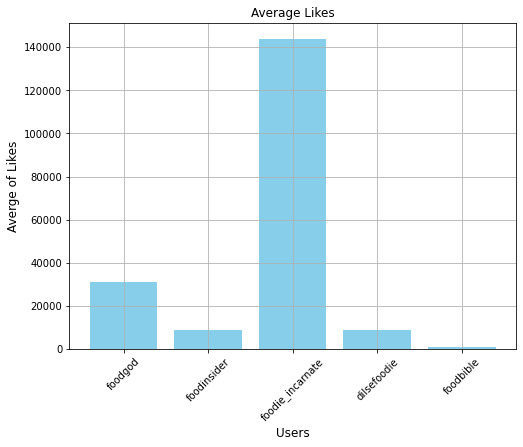

In [37]:
plt.subplots(figsize=(8, 6))
# plot a bar graph using top5_handles list and avg_likes which is obtained
plt.bar(top5_handles, avg_likes, color='skyblue')
plt.title("Average Likes", size=12)
plt.xticks(rotation=45)
plt.xlabel('Users', size=12)
plt.ylabel('Averge of Likes', size=12)
plt.grid()
plt.show()


### 3.3-Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [38]:
# here I am taking no_of_follower list which is obtained by 1.3 question
no_of_follower

[3886062, 2320813, 1374495, 1027793, 934928]

In [39]:
# average likes obtained previous question 3.2
avg_likes

[31275, 8821, 144009, 8954, 1177]

In [40]:
avg_followers = []
for i in range(len(avg_likes)):
    avg_f = int(format(no_of_follower[i]/avg_likes[i], '.0f'))
    avg_followers.append(avg_f)
    print(top5_handles[i], ' : ', 'Average followers are ', avg_f)

foodgod  :  Average followers are  124
foodinsider  :  Average followers are  263
foodie_incarnate  :  Average followers are  10
dilsefoodie  :  Average followers are  115
foodbible  :  Average followers are  794


### 3.4-Create a bar graph to depict the above obtained information.

In [41]:
top5_handles = np.array(top5_handles)
avg_followers = np.array(avg_followers)

top5_handles = top5_handles[np.argsort(avg_followers)]
avg_followers = avg_followers[np.argsort(avg_followers)]


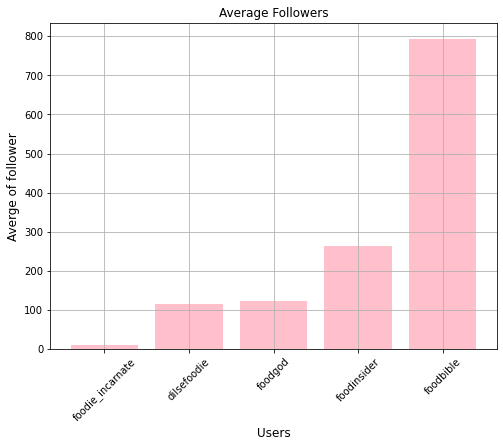

In [42]:
plt.subplots(figsize=(8, 6))
plt.bar(top5_handles, avg_followers, color='pink')
plt.title("Average Followers", size=12)
plt.xticks(rotation=45)
plt.xlabel('Users', size=12)
plt.ylabel('Averge of follower', size=12)
plt.grid()
plt.show()


### close the session of web driver

In [43]:
driver.quit()